                                    Convolutional Neural Networks

Preparing data

In [88]:
import pandas as pd
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
import csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [89]:
os.chdir('C:\\Users\\joe62\\Downloads\\CNN\\Cats and Dogs')
if  os.path.isdir ('Train/dog') is False:
    os.makedirs ('Train/dog')
    os.makedirs ('Test/dog')
    os.makedirs ('Valid/dog')
    os.makedirs ('Train/cat')
    os.makedirs ('Test/cat')
    os.makedirs ('Valid/cat')
    
    
    for c in random.sample (glob.glob ('Dog*'), 500):
        shutil.move (c, 'Train/dog')
    for c in random.sample (glob.glob ('Cat*'), 500):
        shutil.move (c, 'Train/cat')
    for c in random.sample (glob.glob ('Dog*'), 100):
        shutil.move (c, 'Test/dog')
    for c in random.sample (glob.glob ('Cat*'), 100):
        shutil.move (c, 'Test/cat')
    for c in random.sample (glob.glob ('Dog*'), 50):
        shutil.move (c, 'Valid/dog')
    for c in random.sample (glob.glob ('Dog*'), 50):
        shutil.move (c, 'Valid/cat')
        
os.chdir('../../')
    

In [90]:
train_path = "CNN\\Cats and Dogs\\Train"
test_path = "CNN\\Cats and Dogs\\Test"
valid_path = "CNN\\Cats and Dogs\\Valid"

Preprocessing of data

In [91]:
train_batches = ImageDataGenerator (preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (224, 224), classes = [ 'Cat', 'Dog'], batch_size = 10 )
valid_batches = ImageDataGenerator (preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory =valid_path, target_size = (224, 224), classes = [ 'Cat', 'Dog'], batch_size = 10 )
test_batches = ImageDataGenerator (preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory =test_path, target_size = (224, 224), classes = [ 'Cat', 'Dog'], batch_size = 10 )

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [92]:
imgs, labels = next(train_batches)

In [93]:
# This function will plot images in the form of a grid which 1 row and 10 columns where images are place
def plotImages (Images_arr) :
    figs, axes = plt.subplots ( 1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip (Images_arr, axes):
        ax.imshow (img)
        ax.axis ('off')
    plt.tight_layout()
    plt.show()
                            
                               

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

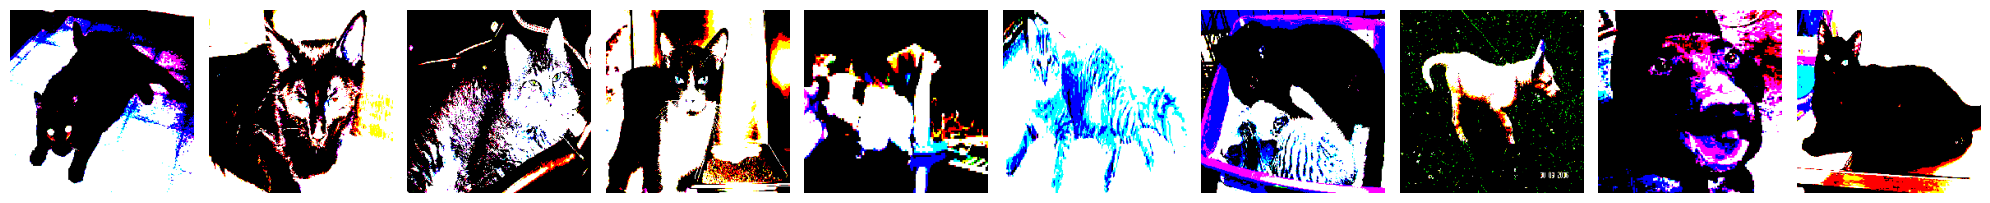

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [94]:
plotImages(imgs)
print(labels)

CNN Model 

In [95]:
model = Sequential ([
    Conv2D(filters =32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2, 2), strides = 2),
    Conv2D(filters =64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2, 2), strides = 2),
    Flatten(),
    Dense(units =2, activation = 'softmax'),
    
])

In [96]:
model.summary ()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 200704)            0         
                                                                 
 dense_5 (Dense)             (None, 2)                

In [97]:
model.compile(optimizer = Adam (learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [98]:
model.fit(x= train_batches, validation_data = valid_batches, batch_size = 32, epochs = 10, verbose = 2)


Epoch 1/10
100/100 - 62s - loss: 24.7713 - accuracy: 0.5140 - val_loss: 9.7289 - val_accuracy: 0.5500 - 62s/epoch - 622ms/step
Epoch 2/10
100/100 - 54s - loss: 3.0863 - accuracy: 0.7400 - val_loss: 7.4132 - val_accuracy: 0.5700 - 54s/epoch - 537ms/step
Epoch 3/10
100/100 - 53s - loss: 0.7971 - accuracy: 0.8800 - val_loss: 5.8812 - val_accuracy: 0.5100 - 53s/epoch - 531ms/step
Epoch 4/10
100/100 - 198s - loss: 0.1975 - accuracy: 0.9500 - val_loss: 6.6265 - val_accuracy: 0.5400 - 198s/epoch - 2s/step
Epoch 5/10
100/100 - 51s - loss: 0.1993 - accuracy: 0.9620 - val_loss: 6.2821 - val_accuracy: 0.5200 - 51s/epoch - 510ms/step
Epoch 6/10
100/100 - 52s - loss: 0.0471 - accuracy: 0.9800 - val_loss: 8.0013 - val_accuracy: 0.5100 - 52s/epoch - 522ms/step
Epoch 7/10
100/100 - 53s - loss: 0.0291 - accuracy: 0.9920 - val_loss: 6.1654 - val_accuracy: 0.5400 - 53s/epoch - 535ms/step
Epoch 8/10
100/100 - 53s - loss: 0.0558 - accuracy: 0.9910 - val_loss: 5.5741 - val_accuracy: 0.5500 - 53s/epoch - 534

    Predicting using the CNN model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

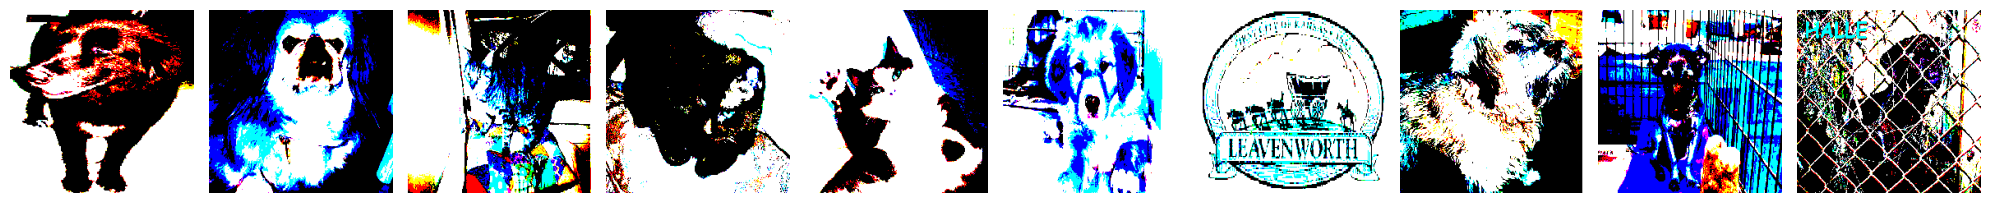

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [99]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [100]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [101]:
predictions = model.predict(x=test_batches, verbose = 0)


In [102]:
np.round (predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

Evaluating the model

In [103]:
cm = confusion_matrix(y_true =test_batches.classes, y_pred =np.argmax(predictions, axis = -1))
print(cm)

[[46 54]
 [51 49]]


In [104]:
def plot_confusion_matrix(cm, classes, 
                          normalize= False, 
                          title = 'Confusion matrix', 
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm=cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix' ),
    else:
            print('Confusion matrix, without normalization' )
    print(cm)
    
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment= "center",
                 color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
test_batches.class_indices

{'Cat': 0, 'Dog': 1}

Confusion matrix, without normalization
[[46 54]
 [51 49]]


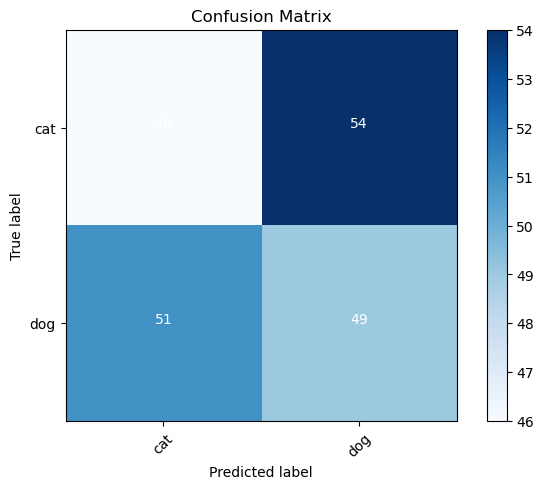

In [106]:
cm_plot_labels = ['cat', 'dog'] 
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')

Build Fine tune VGG16 model

In [107]:
#Download VGG16 model
VGG16_model = tf.keras.applications.vgg16.VGG16()

In [108]:
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [109]:
type (VGG16_model)

keras.engine.functional.Functional

In [110]:
model = Sequential ()
for layer in VGG16_model.layers [: -1]:
    model.add (layer)

In [111]:
model.summary ()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [112]:
for layer in model.layers :
    layer.trainable = False

In [113]:
model.add (Dense (units =2, activation = 'softmax'))

In [114]:
model.summary ()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

 Train the Fine- tunned VGG16 model

In [115]:
model.compile(optimizer = Adam (learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [116]:
model.fit(x= train_batches, validation_data = valid_batches, batch_size = 32, epochs = 5, verbose = 2)

Epoch 1/5
100/100 - 278s - loss: 0.2894 - accuracy: 0.8760 - val_loss: 2.1011 - val_accuracy: 0.4900 - 278s/epoch - 3s/step
Epoch 2/5
100/100 - 279s - loss: 0.0896 - accuracy: 0.9640 - val_loss: 2.5173 - val_accuracy: 0.5000 - 279s/epoch - 3s/step
Epoch 3/5
100/100 - 277s - loss: 0.0559 - accuracy: 0.9780 - val_loss: 2.8074 - val_accuracy: 0.5000 - 277s/epoch - 3s/step
Epoch 4/5
100/100 - 275s - loss: 0.0388 - accuracy: 0.9830 - val_loss: 3.0923 - val_accuracy: 0.5000 - 275s/epoch - 3s/step
Epoch 5/5
100/100 - 278s - loss: 0.0278 - accuracy: 0.9900 - val_loss: 3.0645 - val_accuracy: 0.5100 - 278s/epoch - 3s/step


In [118]:
assert model.history.history.get ('accuracy') [-1] > 0.95

Predicting using fine-tune VGG16 model

In [119]:
predictions = model.predict(x=test_batches, verbose = 0)

In [120]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [121]:
cm = confusion_matrix(y_true =test_batches.classes, y_pred =np.argmax(predictions, axis = -1))
print(cm)

[[50 50]
 [50 50]]


Confusion matrix, without normalization
[[50 50]
 [50 50]]


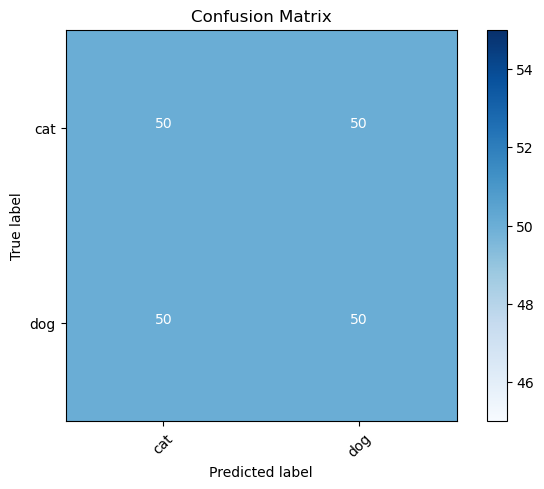

In [122]:
cm_plot_labels = ['cat', 'dog'] 
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')